# Proyek Analisis Data: Bike Sharing Dataset 
- **Nama:** [Alfin Bahru Rahmika Umar]
- **Email:** [Rahmikalfin@gmail.com]
- **ID Dicoding:** [Alfinbahru]

## Pertanyaan Bisnis

- Pertanyaan 1  : Bagaimana performa peminjaman sepeda (rental) terhadap faktor jenis hari?.
- Pertanyaan 2  : Bagaimana performa peminjaman sepeda (rental) terhadap faktor cuaca dan musim?.
- Pertanyaan 3  : Berapa besarnya rental (Peminjaman Sepeda) dalam tahun 2011 menggunakan Time Series?.
- Pertanyaan 4  : Berapa besarnya rental (Peminjaman Sepeda) dalam tahun 2012 menggunakan Time Series?.

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hours_df = pd.read_csv(r"C:\Users\OPTION\Documents\Proyek Akhir\Dataset\hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv(r"C:\Users\OPTION\Documents\Proyek Akhir\Dataset\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [4]:
day_df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspee

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hours_df.info

<bound method DataFrame.info of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0

In [10]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hours_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [13]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan Tabel day_df

###### Mencari Duplicate Dalam Tabel day_df

In [14]:
day_df.duplicated().sum()

0

In [15]:
day_df.drop_duplicates(inplace=True)

In [16]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


#### Mencari Missing Values Dalam Tabel day_df

In [17]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Mencari Inaccurate Values Dalam Tabel day_df

In [18]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Membersihkan Tabel hours_df

###### Mencari Duplicate Dalam Tabel hours_df

In [19]:
hours_df.duplicated().sum()

0

In [20]:
hours_df.drop_duplicates(inplace=True)

In [21]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


#### Mencari Missing Values Dalam Tabel hours_df

In [22]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Mencari Inaccurate Values Dalam Tabel hours_df

In [23]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Dataset yang diperoleh dari Kaggel sudah bersih, sebenarnya tidak diperlukan Data Cleaning. Tidak ada data duplikat, data kosong (Nan) dan format telah sama.

## Exploratory Data Analysis (EDA)

### Explore  `day_df`

In [24]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
128,129,2011-05-09,2,0,5,0,1,1,1,0.532500,0.525246,0.588750,0.176000,664,3698,4362
70,71,2011-03-12,1,0,3,0,6,0,1,0.329167,0.325750,0.594583,0.220775,724,1408,2132
302,303,2011-10-30,4,0,10,0,0,0,1,0.319167,0.321329,0.623750,0.176617,885,2446,3331
393,394,2012-01-29,1,1,1,0,0,0,1,0.282500,0.272721,0.311250,0.240050,558,2685,3243


In [25]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [26]:
day_df.dteday.is_unique

True

In [27]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [28]:
day_df.groupby(by="weekday").agg({
    "cnt": ["max", "min", "count", "sum"]
})

cnt                    
          max   min count     sum
weekday                          
0        8227   605   105  444027
1        7525    22   105  455503
2        7767   683   104  469109
3        8173   441   104  473048
4        7804   431   104  485395
5        8362  1167   104  487790
6        8714   627   105  477807

In [29]:
day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "sum", "count"]
})

cnt                    
             max  min      sum count
weathersit                          
1           8714  431  2257952   463
2           8362  605   996858   247
3           4639   22    37869    21

In [30]:
day_df.groupby(by="workingday").agg({
    "cnt": ["sum", "count"]
})

cnt      
                sum count
workingday               
0           1000269   231
1           2292410   500

In [31]:
day_df.groupby(by="dteday").agg({
    "cnt": ["min", "max", "mean", "std", "sum", "count"]
})

cnt                              
             min   max    mean std   sum count
dteday                                        
2011-01-01   985   985   985.0 NaN   985     1
2011-01-02   801   801   801.0 NaN   801     1
2011-01-03  1349  1349  1349.0 NaN  1349     1
2011-01-04  1562  1562  1562.0 NaN  1562     1
2011-01-05  1600  1600  1600.0 NaN  1600     1
...          ...   ...     ...  ..   ...   ...
2012-12-27  2114  2114  2114.0 NaN  2114     1
2012-12-28  3095  3095  3095.0 NaN  3095     1
2012-12-29  1341  1341  1341.0 NaN  1341     1
2012-12-30  1796  1796  1796.0 NaN  1796     1
2012-12-31  2729  2729  2729.0 NaN  2729     1

[731 rows x 6 columns]

In [32]:
day_df.groupby(by="mnth").agg({
    "cnt": ["sum", "count", "mean"]
})

cnt                   
         sum count         mean
mnth                           
1     134933    62  2176.338710
2     151352    57  2655.298246
3     228920    62  3692.258065
4     269094    60  4484.900000
5     331686    62  5349.774194
6     346342    60  5772.366667
7     344948    62  5563.677419
8     351194    62  5664.419355
9     345991    60  5766.516667
10    322352    62  5199.225806
11    254831    60  4247.183333
12    211036    62  3403.806452

In [33]:
day_df.groupby(by="yr").agg({
    "cnt": ["sum", "count"]
})

cnt      
        sum count
yr               
0   1243103   365
1   2049576   366

In [34]:
day_df.groupby(by="season").agg({
    "cnt": ["sum", "count"]
})

cnt      
            sum count
season               
1        471348   181
2        918589   184
3       1061129   188
4        841613   178

### Explore  `hours_df`

In [35]:
hours_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15615,15616,2012-10-17,4,1,10,20,0,3,1,1,0.50,0.4848,0.72,0.1343,54,360,414
13098,13099,2012-07-04,3,1,7,23,1,3,0,2,0.78,0.6970,0.43,0.0896,31,152,183
550,551,2011-01-25,1,0,1,2,0,2,1,1,0.16,0.1515,0.69,0.2239,0,2,2
5899,5900,2011-09-08,3,0,9,8,0,4,1,3,0.62,0.5455,0.94,0.1343,7,188,195
6844,6845,2011-10-17,4,0,10,18,0,1,1,1,0.56,0.5303,0.60,0.0000,49,469,518


In [36]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [37]:
hours_df.dteday.is_unique

False

In [38]:
hours_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [39]:
hours_df.groupby(by="weekday").agg({
    "cnt": ["max", "min", "count", "sum"]
})

cnt                  
         max min count     sum
weekday                       
0        776   1  2502  444027
1        968   1  2479  455503
2        970   1  2453  469109
3        977   1  2475  473048
4        976   1  2471  485395
5        957   1  2487  487790
6        783   1  2512  477807

In [40]:
hours_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "sum", "count"]
})

cnt                    
            max min      sum  count
weathersit                         
1           977   1  2338173  11413
2           957   1   795952   4544
3           891   1   158331   1419
4           164  23      223      3

In [41]:
hours_df.groupby(by="workingday").agg({
    "cnt": ["sum", "count"]
})

cnt       
                sum  count
workingday                
0           1000269   5514
1           2292410  11865

In [42]:
hours_df.groupby(by="hr").agg({
    "cnt": ["sum", "count", "mean"]
})

cnt                  
       sum count        mean
hr                          
0    39130   726   53.898072
1    24164   724   33.375691
2    16352   715   22.869930
3     8174   697   11.727403
4     4428   697    6.352941
5    14261   717   19.889819
6    55132   725   76.044138
7   154171   727  212.064649
8   261001   727  359.011004
9   159438   727  219.309491
10  126257   727  173.668501
11  151320   727  208.143054
12  184414   728  253.315934
13  184919   729  253.661180
14  175652   729  240.949246
15  183149   729  251.233196
16  227748   730  311.983562
17  336860   730  461.452055
18  309772   728  425.510989
19  226789   728  311.523352
20  164550   728  226.030220
21  125445   728  172.314560
22   95612   728  131.335165
23   63941   728   87.831044

In [43]:
hours_df.groupby(by="mnth").agg({
    "cnt": ["sum", "count", "mean"]
})

cnt                  
         sum count        mean
mnth                          
1     134933  1429   94.424773
2     151352  1341  112.865026
3     228920  1473  155.410726
4     269094  1437  187.260960
5     331686  1488  222.907258
6     346342  1440  240.515278
7     344948  1488  231.819892
8     351194  1475  238.097627
9     345991  1437  240.773138
10    322352  1451  222.158511
11    254831  1437  177.335421
12    211036  1483  142.303439

In [44]:
hours_df.groupby(by="yr").agg({
    "cnt": ["sum", "count"]
})

cnt      
        sum count
yr               
0   1243103  8645
1   2049576  8734

In [45]:
hours_df.groupby(by="season").agg({
    "cnt": ["sum", "count"]
})

cnt      
            sum count
season               
1        471348  4242
2        918589  4409
3       1061129  4496
4        841613  4232

In [46]:
hours_df.groupby(by="dteday").agg({
    "cnt": ["min", "max", "mean", "std", "sum", "count"]
})

cnt                                        
           min  max        mean        std   sum count
dteday                                                
2011-01-01   1  110   41.041667  34.292196   985    24
2011-01-02   1   93   34.826087  29.785067   801    23
2011-01-03   1  157   61.318182  48.792453  1349    22
2011-01-04   1  212   67.913043  59.889985  1562    23
2011-01-05   2  195   69.565217  58.427753  1600    23
...         ..  ...         ...        ...   ...   ...
2012-12-27   1  257   88.083333  72.027722  2114    24
2012-12-28   2  271  128.958333  95.264154  3095    24
2012-12-29   3  147   55.875000  41.957859  1341    24
2012-12-30   2  169   74.833333  56.244549  1796    24
2012-12-31   1  315  113.708333  87.936973  2729    24

[731 rows x 6 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa peminjaman sepeda (rental) terhadap faktor jenis hari?.

#### Hubungan Jumlah Rental Dengan Jenis Hari

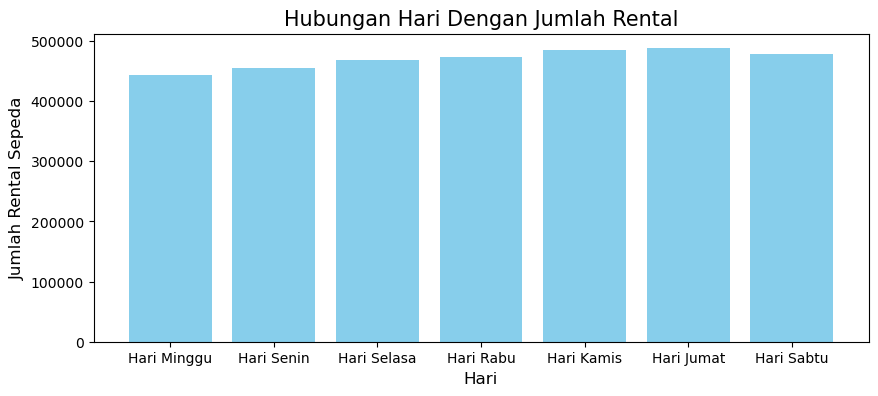

In [47]:
# Melakukan agregasi data
agg_df = day_df.groupby(by="weekday").agg({
    "cnt": ["max", "min", "count", "sum"]
})

# Mengambil kolom 'sum' dari hasil agregasi
# Karena hasil agregasi memiliki MultiIndex, kita perlu mengakses kolom 'sum' di bawah 'cnt'
sum_values = agg_df['cnt', 'sum']

# Melakukan agregasi data
agg_df = day_df.groupby(by="weekday").agg({
    "cnt": ["max", "min", "count", "sum"]
})

# Mengambil kolom 'sum' dari hasil agregasi
# Karena hasil agregasi memiliki MultiIndex, kita perlu mengakses kolom 'sum' di bawah 'cnt'
sum_values = agg_df['cnt', 'sum']

# Membuat mapping dari weekday (0-6) ke nama hari dalam bahasa Indonesia
weekday_map = {
    0: "Hari Minggu",
    1: "Hari Senin",
    2: "Hari Selasa",
    3: "Hari Rabu",
    4: "Hari Kamis",
    5: "Hari Jumat",
    6: "Hari Sabtu"}

# Mengganti nilai index 'workingday' dengan nama hari menggunakan .map()
sum_values.index = sum_values.index.map(weekday_map)

# Membuat bar plot
plt.figure(figsize=(10, 4))
plt.bar(sum_values.index, sum_values, color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah Rental Sepeda', fontsize=12)
plt.title('Hubungan Hari Dengan Jumlah Rental', fontsize=15)

# Menampilkan plot
plt.show()

**Insight:**
Berdasarkan hasil visualisasi data yang telah dilakukan cleaning, terungkap bahwa rental sepeda terbesar jatuh pada hari Jum'at (hari ke-5) disusul oleh hari Kamis dan hari Sabtu. Data Time Series dari tahun 2011 sampai 2012 menujukkan, bahwa total peminjaman sepeda hampir mencapai 500000 peminjaman selama 1 tahun.

#### Hubungan Jumlah Rental Dengan Jenis Hari Kerja

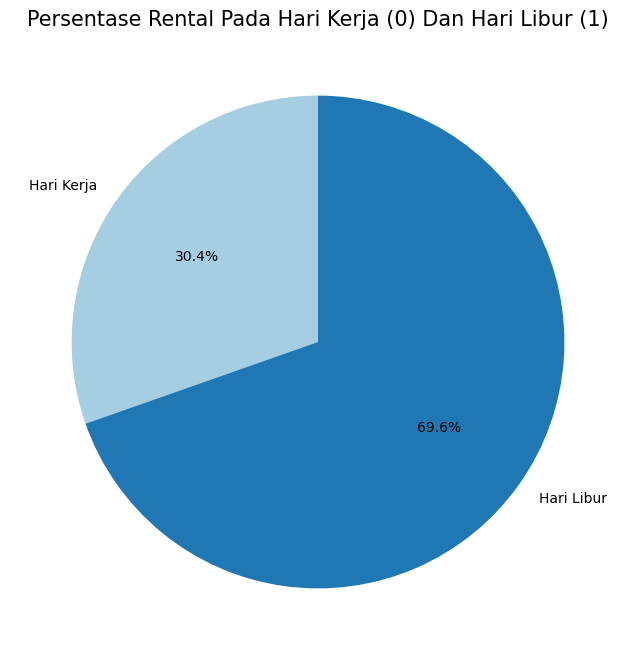

In [48]:
# Melakukan agregasi data
agg_df = day_df.groupby(by="workingday").agg({
    "cnt": ["sum", "count"]
}) 

# Mengambil kolom 'sum' dari hasil agregasi
sum_values = agg_df['cnt', 'sum']

# Membuat mapping dari weekday (0-6) ke nama hari dalam bahasa Indonesia
workingday_map = {
    0: "Hari Kerja",
    1: "Hari Libur",}

# Mengganti nilai index 'workingday' dengan nama hari menggunakan .map()
sum_values.index = sum_values.index.map(workingday_map)

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sum_values, labels=sum_values.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Menambahkan judul
plt.title('Persentase Rental Pada Hari Kerja (0) Dan Hari Libur (1)', fontsize=15)

# Menampilkan pie chart
plt.show()

**Insight:**
Hasil visualisasi data terlihat bahwa orang-orang cenderung melakukan peminjaman sepeda (rental sepeda) pada hari libur (weekend) seperti hari sabtu dan minggu, dibandingkan dengan hari-hari kerja (weekdays). Persentase peminjaman pada hari libur dan hari kerja adalah 69,6% banding 30,4%.

### Pertanyaan 2  : Bagaimana performa peminjaman sepeda (rental) terhadap faktor cuaca dan musim?.

#### Hubungan Jumlah Rental Dengan Faktor Cuaca (Weathersit)

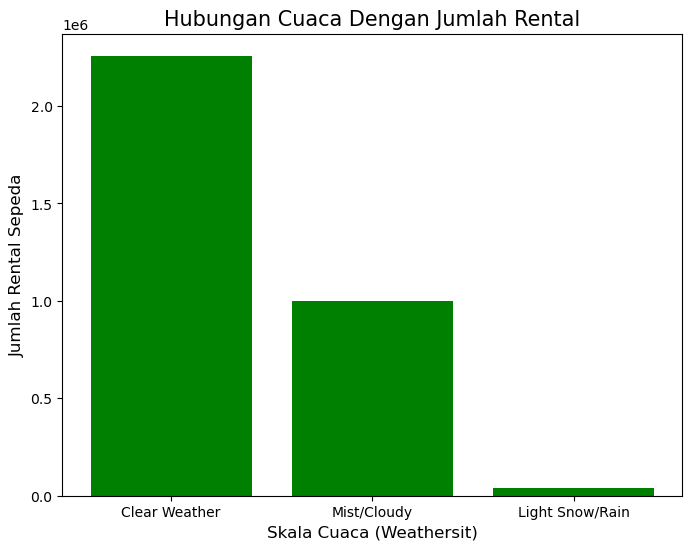

In [49]:
# Melakukan agregasi data berdasarkan cuaca
agg_df = day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "sum", "count"]
})

# Mengambil kolom 'sum' dari hasil agregasi
sum_values_weather = agg_df['cnt', 'sum']

# Membuat mapping dari weather (1-4)
weather_map = {
    1: "Clear Weather",
    2: "Mist/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Thunderstorm",
}

# Mengganti nilai index 'weathersit' dengan deskripsi cuaca menggunakan .map()
sum_values_weather.index = sum_values_weather.index.map(weather_map)

# Membuat bar plot
plt.figure(figsize=(8, 6))
plt.bar(sum_values_weather.index, sum_values_weather, color='green')

# Menambahkan label dan judul
plt.xlabel('Skala Cuaca (Weathersit)', fontsize=12)
plt.ylabel('Jumlah Rental Sepeda', fontsize=12)
plt.title('Hubungan Cuaca Dengan Jumlah Rental', fontsize=15)

# Menampilkan plot
plt.show()

**Insight:**
Weathersit dapat dianalogikan sebagai skala cuaca, berdasarkan keterangan pada sumber dataset (Kaggle), berikut adalah informasinya:
##### weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
###### Insight:
Pada Bar Chart, terlihat bahwa orang-orang jarang melakukan peminjaman sepeda apabila nilai Weathersit adalah 3, karena faktor salju, hujan gerimis, petir dan cuaca yang kurang bersahabat. Peminjaman sepeda paling sering terjadi pada skala Weathersit 1, dimana cuaca bersih, tanpa hujan dan salju.

#### Hubungan Jumlah Rental Dengan Musim

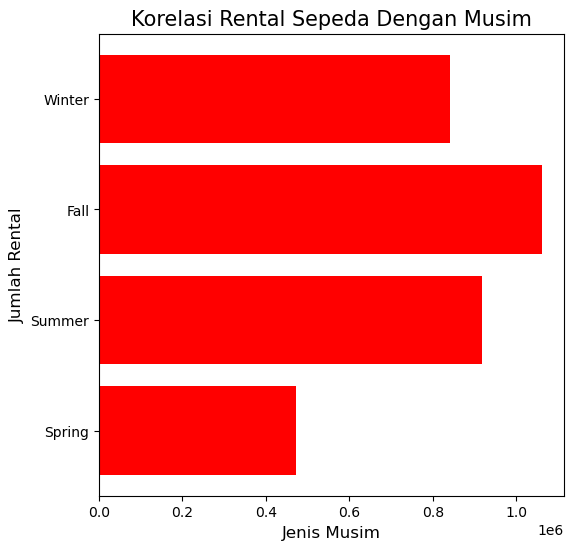

In [50]:
agg_df = day_df.groupby(by="season").agg({
    "cnt": ["sum", "count"]
}) 

# Mengambil kolom 'sum' dari hasil agregasi
# Karena hasil agregasi memiliki MultiIndex, kita perlu mengakses kolom 'sum' di bawah 'cnt'
sum_values = agg_df['cnt', 'sum']



# Membuat mapping dari season (1-4)
season_map = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter",
}

# Mengganti nilai index 'weekday' dengan nama hari menggunakan .map()
sum_values.index = sum_values.index.map(season_map)

# Membuat bar plot
plt.figure(figsize=(6, 6))
plt.barh(sum_values.index, sum_values, color='red')

# Menambahkan label dan judul
plt.xlabel('Jenis Musim', fontsize=12)
plt.ylabel('Jumlah Rental', fontsize=12)
plt.title('Korelasi Rental Sepeda Dengan Musim', fontsize=15)

# Menampilkan plot
plt.show()

**Insight:**
Berdasarkan informasi diatas, peminjaman sepeda (rental) lebih sering terjadi pada musim panas (summer) dan musim gugur (fall), masing-masing nilai hampir mencapai 9 x 10^6 dan lebih dari 10^6 peminjaman total selama tahun 2011 - 2012

### Pertanyaan 3  : Berapa besarnya rental (Peminjaman Sepeda) dalam tahun 2011?.

#### Jumlah Peminjaman Sepeda Sepanjang Tahun 2011

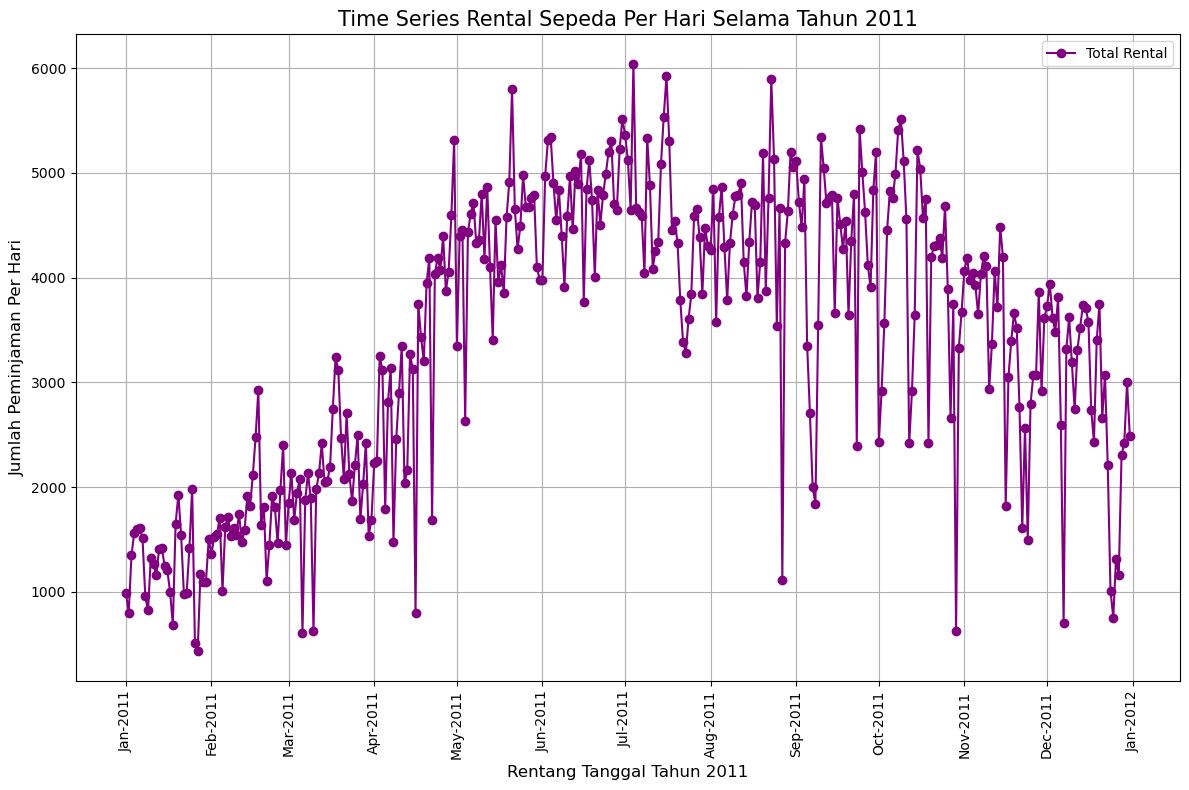

In [51]:
## Memastikan kolom 'dteday' dalam format datetime
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

# Memfilter data hanya untuk tahun 2011
df_2011 = hours_df[hours_df['dteday'].dt.year == 2011]

# Melakukan agregasi seperti yang sudah kamu lakukan
agg_2011 = df_2011.groupby(by="dteday").agg({
    "cnt": ["min", "max", "mean", "std", "sum", "count"]
})

# Mengambil kolom 'sum' dari hasil agregasi
sum_values_2011 = agg_2011['cnt', 'sum']

# Membuat plot time series
plt.figure(figsize=(12, 8))
plt.plot(sum_values_2011.index, sum_values_2011, color='purple', marker='o', linestyle='-', label='Total Rental')

# Menambahkan label dan judul
plt.xlabel('Rentang Tanggal Tahun 2011', fontsize=12)
plt.ylabel('Jumlah Peminjaman Per Hari', fontsize=12)
plt.title('Time Series Rental Sepeda Per Hari Selama Tahun 2011', fontsize=15)

# Format sumbu X (menampilkan tanggal dengan format bulanan)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Memutar label tanggal agar lebih mudah dibaca
plt.xticks(rotation=90)

# Menambahkan grid
plt.grid(True)

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Pertanyaan 3  : Berapa besarnya rental (Peminjaman Sepeda) dalam tahun 2011?.

In [52]:
# Mengambil nilai SUM maksimal
max_sum_value = sum_values_2011.max()

# Mendapatkan tanggal di mana SUM maksimal terjadi
max_sum_date = sum_values_2011.idxmax()

# Menghitung total nilai SUM pada tahun 2011
total_sum_2011 = sum_values_2011.sum()

# Mengambil nilai SUM minimal
min_sum_value = sum_values_2011.min()

# Mendapatkan tanggal di mana SUM minimal terjadi
min_sum_date = sum_values_2011.idxmin()

# Menampilkan hasil
print(f"Total Nilai Rental Tahun 2011: {total_sum_2011}", "Peminjaman")
print(f"Total Nilai Rental Terbesar: {max_sum_value}")
print(f"Terjadi pada tanggal: {max_sum_date}")
print(f"Total Nilai Rental Terkecil: {min_sum_value}")
print(f"Terjadi pada tanggal: {min_sum_date}")

Total Nilai Rental Tahun 2011: 1243103 Peminjaman
Total Nilai Rental Terbesar: 6043
Terjadi pada tanggal: 2011-07-04 00:00:00
Total Nilai Rental Terkecil: 431
Terjadi pada tanggal: 2011-01-27 00:00:00


**Insight:**
######  Berdasarkan Grafik TIME SERIES selama tahun 2011 disimpulkan hal berikut:
Total Nilai Rental Selama Tahun 2011: 1243103 Peminjaman.
Total Nilai Rental Terbesar: 6043, terjadi pada tanggal: 2011-07-04.
Total Nilai Rental Terkecil: 431, terjadi pada tanggal: 2011-01-27.

#### Pertanyaan 4  : Berapa besarnya rental (Peminjaman Sepeda) dalam tahun 2012?.

#### Jumlah Peminjaman Sepeda Sepanjang Tahun 2012

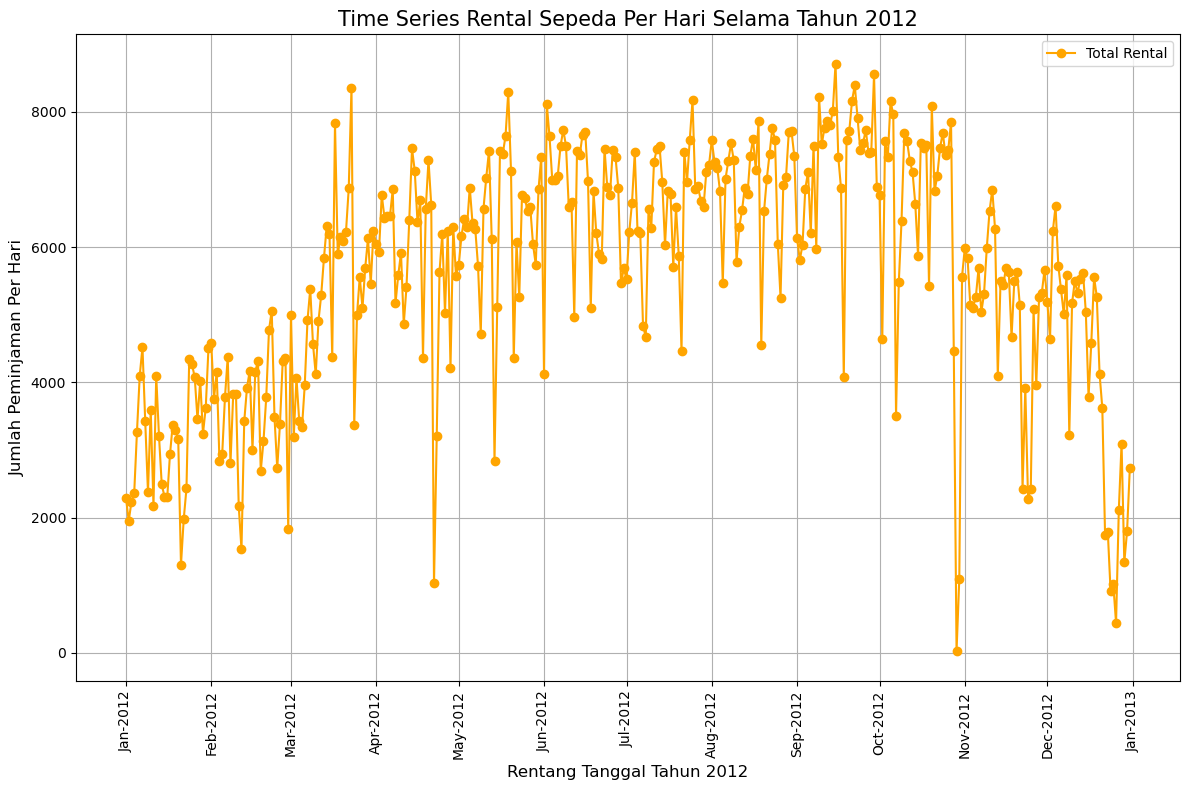

In [53]:
## Memastikan kolom 'dteday' dalam format datetime
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

# Memfilter data hanya untuk tahun 2011
df_2012 = hours_df[hours_df['dteday'].dt.year == 2012]

# Melakukan agregasi seperti yang sudah kamu lakukan
agg_2012 = df_2012.groupby(by="dteday").agg({
    "cnt": ["min", "max", "mean", "std", "sum", "count"]
})

# Mengambil kolom 'sum' dari hasil agregasi
sum_values_2012 = agg_2012['cnt', 'sum']

# Membuat plot time series
plt.figure(figsize=(12, 8))
plt.plot(sum_values_2012.index, sum_values_2012, color='orange', marker='o', linestyle='-', label='Total Rental')

# Menambahkan label dan judul
plt.xlabel('Rentang Tanggal Tahun 2012', fontsize=12)
plt.ylabel('Jumlah Peminjaman Per Hari', fontsize=12)
plt.title('Time Series Rental Sepeda Per Hari Selama Tahun 2012', fontsize=15)

# Format sumbu X (menampilkan tanggal dengan format bulanan)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Memutar label tanggal agar lebih mudah dibaca
plt.xticks(rotation=90)

# Menambahkan grid
plt.grid(True)

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Tanggal Dengan Jumlah Rental Terbanyak Dan Paling Sedikit Tahun 2012

In [54]:
# Mengambil nilai SUM maksimal
max_sum_value = sum_values_2012.max()

# Mendapatkan tanggal di mana SUM maksimal terjadi
max_sum_date = sum_values_2012.idxmax()

# Mengambil nilai SUM minimal
min_sum_value = sum_values_2012.min()

# Mendapatkan tanggal di mana SUM minimal terjadi
min_sum_date = sum_values_2012.idxmin()

# Menghitung total nilai SUM pada tahun 2012
total_sum_2012 = sum_values_2012.sum()

# Menampilkan hasil
print(f"Total Nilai Rental Tahun 2012: {total_sum_2012}", "Peminjaman")
print(f"Total Nilai Rental Terbesar: {max_sum_value}")
print(f"Terjadi pada tanggal: {max_sum_date}")
print(f"Total Nilai Rental Terkecil: {min_sum_value}")
print(f"Terjadi pada tanggal: {min_sum_date}")

Total Nilai Rental Tahun 2012: 2049576 Peminjaman
Total Nilai Rental Terbesar: 8714
Terjadi pada tanggal: 2012-09-15 00:00:00
Total Nilai Rental Terkecil: 22
Terjadi pada tanggal: 2012-10-29 00:00:00


**Insight:**
##### Berdasarkan Grafik TIME SERIES selama tahun 2012 disimpulkan hal berikut:
Total Nilai Rental Tahun 2012: 2049576 Peminjaman.
Total Nilai Rental Terbesar: 8714, terjadi pada tanggal: 2012-09-15.
Total Nilai Rental Terkecil: 22, terjadi pada tanggal: 2012-10-29.

## Kesimpulan : 

Rental sepeda terbesar umumnya jatuh pada hari Jum'at (hari ke-5) disusul oleh hari Kamis dan hari Sabtu, terutama menjelang Weekend. Data Time Series dari tahun 2011 sampai 2012 menujukkan, bahwa total peminjaman sepeda mencapai hampir 500000 peminjaman selama 1 tahun, terlihat bahwa orang-orang cenderung melakukan peminjaman sepeda (rental sepeda) pada hari libur (weekend) seperti hari sabtu dan minggu, dibandingkan dengan hari-hari kerja (weekdays). Persentase peminjaman pada hari libur dan hari kerja adalah 69,6% banding 30,4%. Orang-orang jarang melakukan peminjaman sepeda apabila nilai Weathersit adalah 3, karena faktor salju, hujan gerimis, petir dan cuaca yang kurang bersahabat. Peminjaman sepeda paling sering terjadi pada skala Weathersit 1, dimana cuaca bersih, tanpa hujan dan salju. Peminjaman sepeda (rental) lebih sering terjadi pada musim panas (summer) dan musim gugur (fall), masing-masing nilai hampir mencapai 9 x 10^6 dan lebih dari 10^6 peminjaman total selama tahun 2011 - 2012.
Tahun 2011, rincian exploratory data adalah sebagai berikut : Total Nilai Rental Selama Tahun 2011: 1243103 Peminjaman. Total Nilai Rental Terbesar: 6043, terjadi pada tanggal: 2011-07-04. Total Nilai Rental Terkecil: 431, terjadi pada tanggal: 2011-01-27. Sedangkan pada tahun 2012, rinciannya adalah sebagai berikut: Total Nilai Rental Tahun 2012: 2049576 Peminjaman. Total Nilai Rental Terbesar: 8714, terjadi pada tanggal: 2012-09-15. Total Nilai Rental Terkecil: 22, terjadi pada tanggal: 2012-10-29.
